In [3]:
import time


In [4]:
notebookstart = time.time()

In [5]:
import numpy as sns
import pandas as pd

In [6]:
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl



In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC


In [9]:

from sklearn.feature_extraction.text import TfidfVectorizer

import os
import gc

In [10]:
debug = False
df = pd.read_json('/Users/nino/Desktop/Kaggle/cooking/all/train.json').set_index('id')
test_df = pd.read_json('/Users/nino/Desktop/Kaggle/cooking/all/test.json').set_index('id')


In [11]:
if debug is True:
    df = df.sample(100)
    elss
    test_df = test_df.sample(100)
traindex = df.index
testdex = test_df.index
print("Training Data Shape: ",df.shape)
print("Testing Data Shape: ", test_df.shape)
y = df.cuisine.copy()

Training Data Shape:  (39774, 2)
Testing Data Shape:  (9944, 1)


All Data Shape:  (49718, 1)


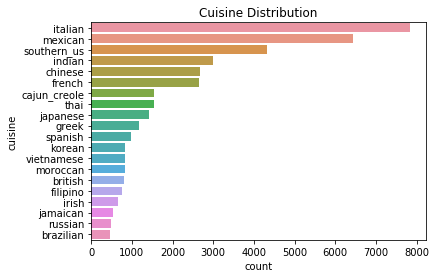

,ingredients
id,
10259,"[romaine lettuce, black olives, grape tomatoes..."
25693,"[plain flour, ground pepper, salt, tomatoes, g..."
20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
22213,"[water, vegetable oil, wheat, salt]"
13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [12]:
# Combine For Pre-Processing
df = pd.concat([df.drop("cuisine", axis=1), test_df], axis=0)
df_index = df.index
print("All Data Shape: ", df.shape)
del test_df; gc.collect();

sns.countplot(y=y, order=y.value_counts().reset_index()["index"])
plt.title("Cuisine Distribution")
plt.show()

df.head()

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(tokenizer=lambda x: [i.strip() for i in x.split(',')], lowercase=False)
dummies = vect.fit_transform(df['ingredients'].apply(','.join)) 

df = pd.DataFrame(dummies.todense(),columns=vect.get_feature_names())
print("Vocab Length: ", len(vect.get_feature_names()))
print("All Data Shape: ", df.shape)
df.index= df_index

print("Number of Predictors: ", df.shape[0])
df.head()

Vocab Length:  7147
All Data Shape:  (49718, 7147)
Number of Predictors:  49718


,,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,1 inch thick,1% low-fat buttermilk,1% low-fat chocolate milk,...,yuzu,yuzu juice,za'atar,zabaglione,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
id,,,,,,,,,,,,,,,,,,,,,
10259,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25693,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22213,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13162,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
X = df.loc[traindex,:]
print("Number of Cuisine Types: ", y.nunique())
print("X Shape: ", X.shape)
test_df = df.loc[testdex,:]
print("Test DF Shape: ", test_df.shape)
del df; gc.collect();

Number of Cuisine Types:  20
X Shape:  (39774, 7147)
Test DF Shape:  (9944, 7147)


In [16]:
LogisticRegression().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [29]:
model = LogisticRegression(multi_class= 'ovr')
score = cross_validate(model, X, y, return_train_score=False)
print(score)
score["test_score"].mean()

{'fit_time': array([ 8.05806994,  8.05079412,  7.91123986]), 'score_time': array([ 0.75043917,  0.71849394,  0.71313787]), 'test_score': array([ 0.77508859,  0.77381401,  0.77897676])}


0.77595978789094888

In [18]:
model.fit(X,y)
submission = model.predict(test_df)
submission_df = pd.Series(submission, index=testdex).rename('cuisine')
submission_df.to_csv("logistic_sub.csv", index=True, header=True)
print(submission_df.head())

id
18009         british
28583     southern_us
41580         italian
29752    cajun_creole
35687         italian
Name: cuisine, dtype: object


SyntaxError: invalid syntax (<ipython-input-27-35e659f20af3>, line 2)

(1, 2)